<a href="https://colab.research.google.com/github/JamshedAli18/Customer-Segmentation-for-Marketing/blob/main/Customer_Segmentation_for_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.impute import KNNImputer

In [ ]:
df = pd.read_csv("/content/Train.csv")

In [ ]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
df.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76


In [ ]:
# Step 1: Data Preprocessing
## Handling Missing Values
# Categorical Columns - Mode Imputation
categorical_cols = ['Ever_Married', 'Graduated', 'Profession', 'Var_1']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)



<ipython-input-6-128225ba6cd2>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
# Numerical Columns - KNN Imputation
imputer = KNNImputer(n_neighbors=5)
numerical_cols = ['Work_Experience', 'Family_Size']
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])



In [ ]:
## Feature Engineering
# Encode Categorical Variables
categorical_features = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1']
df_encoded = pd.get_dummies(df[categorical_features], drop_first=True)



In [ ]:
# Normalize Numerical Features
scaler = StandardScaler()
numerical_features = ['Age', 'Work_Experience', 'Family_Size']
df_scaled = scaler.fit_transform(df[numerical_features])



In [ ]:
# Combine Encoded and Scaled Features
processed_data = np.hstack([df_scaled, df_encoded])



In [ ]:
processed_data

array([[-1.28462344, -0.49640885,  0.77318129, ...,  0.        ,
         0.        ,  0.        ],
       [-0.32715082,  0.05657184,  0.1082983 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.40826831, -0.49640885, -1.22146768, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.62636101, -0.49640885, -1.22146768, ...,  0.        ,
         1.        ,  0.        ],
       [-0.98541324, -0.49640885,  0.77318129, ...,  0.        ,
         1.        ,  0.        ],
       [-0.38699286, -0.80362035,  0.1082983 , ...,  0.        ,
         0.        ,  0.        ]])

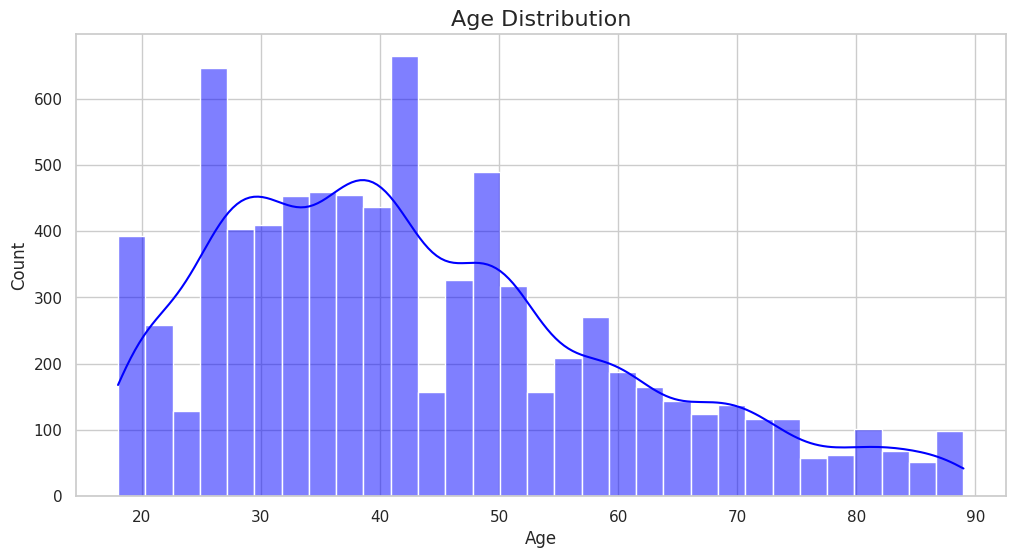

In [ ]:
# Step 2: Exploratory Data Analysis (EDA)
## Visualizing Data Distributions
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], kde=True, color='blue')
plt.title("Age Distribution", fontsize=16)
plt.show()



<ipython-input-13-a237ec1b67e3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ever_Married', data=df, palette='Set2')


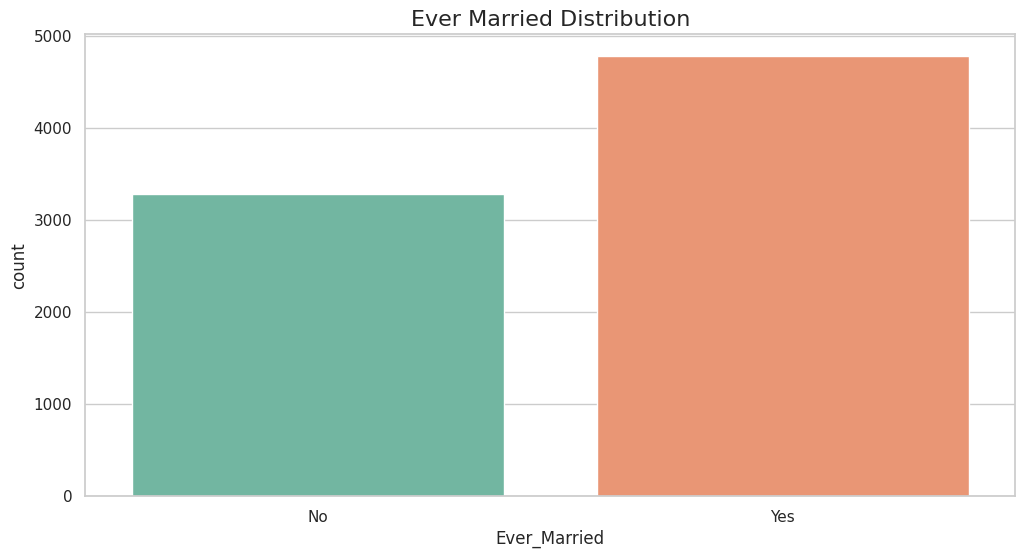

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Ever_Married', data=df, palette='Set2')
plt.title("Ever Married Distribution", fontsize=16)
plt.show()



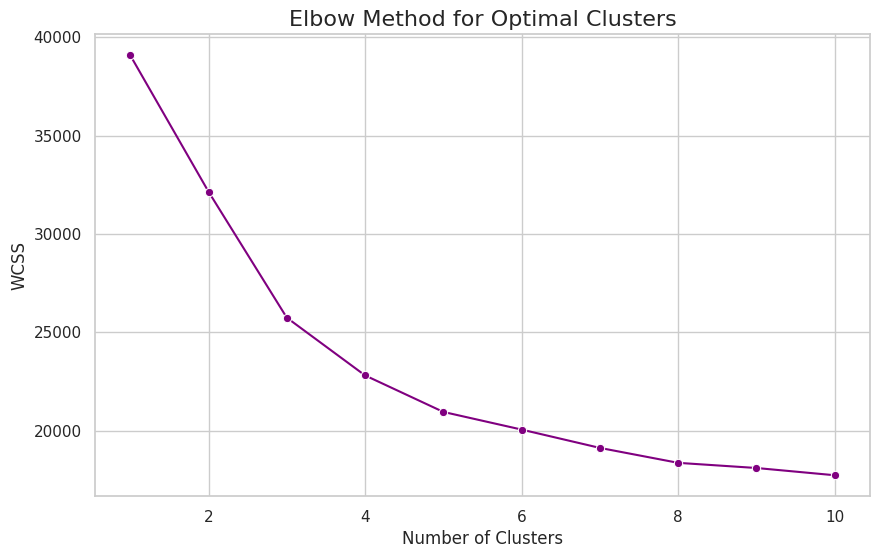

In [ ]:
# Step 3: Clustering
## Determine Optimal Number of Clusters (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(processed_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='purple')
plt.title("Elbow Method for Optimal Clusters", fontsize=16)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()



In [ ]:
## Apply KMeans with Optimal Clusters
optimal_clusters = 4  # Replace based on elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(processed_data)
df['Cluster'] = clusters



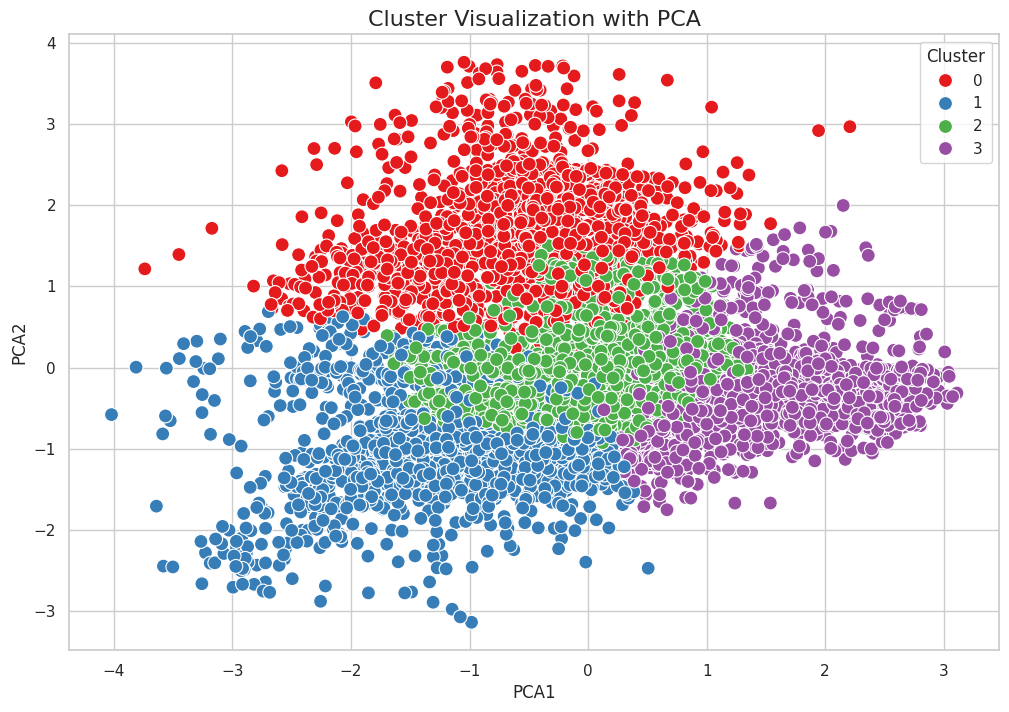

In [ ]:
## PCA for Visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(processed_data)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set1', s=100)
plt.title("Cluster Visualization with PCA", fontsize=16)
plt.show()


<ipython-input-20-165ac6dda5eb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Family_Size', data=df, palette='Set3')


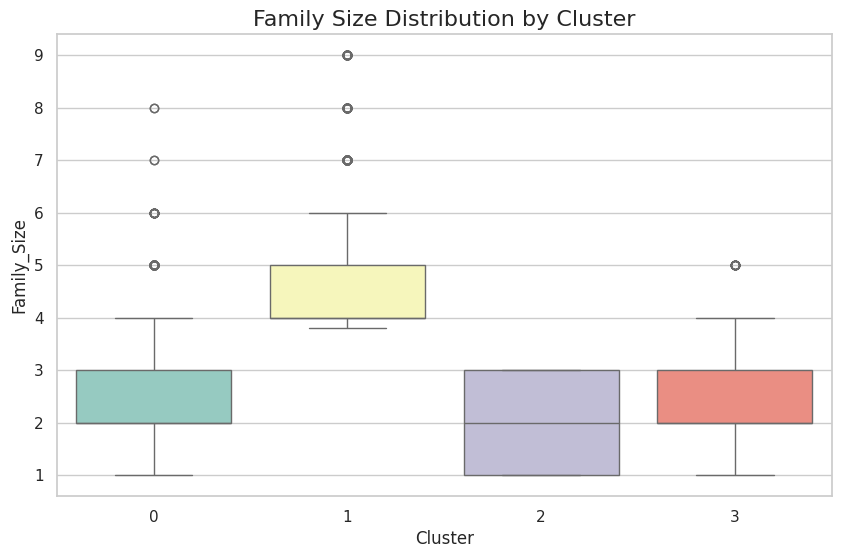

In [ ]:

# Visualize Spending Score vs Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Family_Size', data=df, palette='Set3')
plt.title("Family Size Distribution by Cluster", fontsize=16)
plt.show()



In [ ]:
# Step 5: Recommendations
## Example Marketing Actions
recommendations = {
    0: "Target high-value customers with loyalty programs.",
    1: "Re-engage dormant users with special discounts.",
    2: "Promote luxury products to this segment.",
    3: "Offer budget-friendly options for value-conscious customers."
}

for cluster, action in recommendations.items():
    print(f"Cluster {cluster}: {action}")


Cluster 0: Target high-value customers with loyalty programs.
Cluster 1: Re-engage dormant users with special discounts.
Cluster 2: Promote luxury products to this segment.
Cluster 3: Offer budget-friendly options for value-conscious customers.


Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       459
           1       1.00      0.98      0.99       561
           2       1.00      0.99      1.00       807
           3       0.99      1.00      0.99       594

    accuracy                           0.99      2421
   macro avg       0.99      0.99      0.99      2421
weighted avg       0.99      0.99      0.99      2421



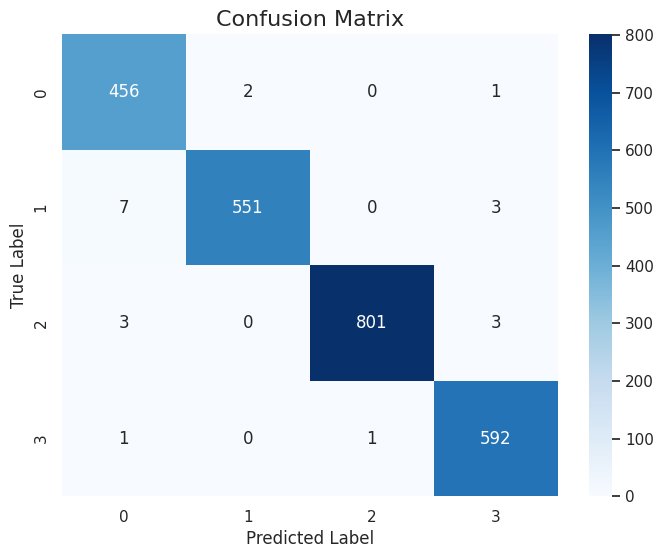

<ipython-input-23-b426351dbbb2>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


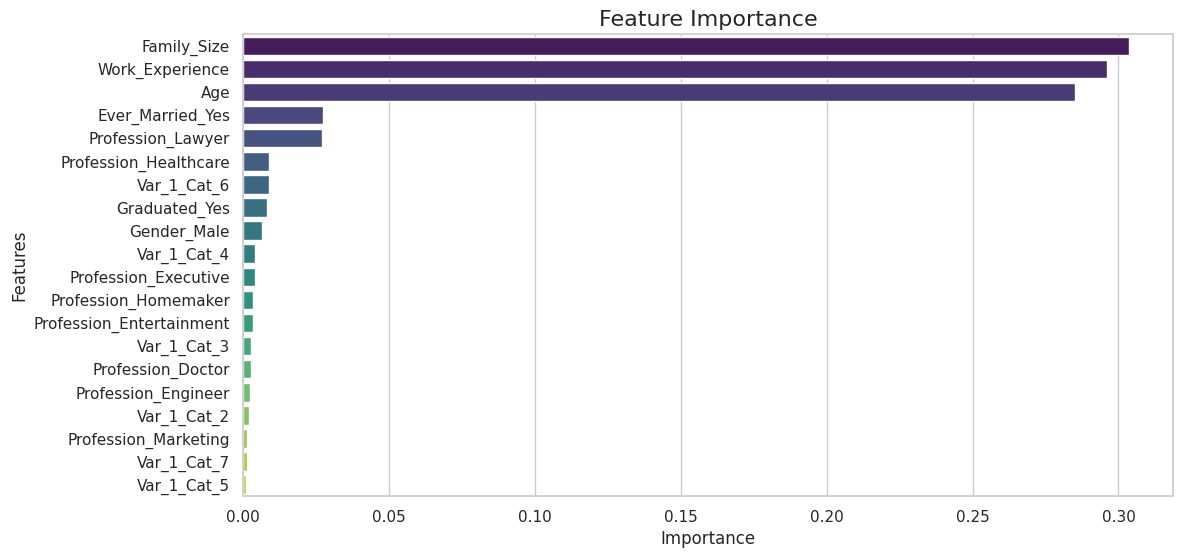

In [ ]:
# Import Libraries for Modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Prepare the Data
X = processed_data  # Features (scaled and encoded data from preprocessing)
y = df['Cluster']  # Target variable (customer clusters)

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 2: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Step 3: Evaluate the Model
# Predict on Test Data
y_pred = model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Step 4: Visualize Feature Importance
feature_importances = model.feature_importances_

# Combine Feature Importance with Feature Names
feature_names = numerical_features + list(df_encoded.columns)
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance", fontsize=16)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
